# Medical Costs Analysis for Smokers and Non-smokers

## Analysis and Regression Models

## PART 1 :: Analysis :

### **Columns:**

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** number of children covered by health insurance / number of dependents

**smoker:** smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** individual medical costs billed by health insurance

In [94]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [95]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [96]:
data = pd.read_csv('insurance.csv')

In [97]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [100]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

#### Creating the Heat-Map to understand which co-relation model will be best for the dataset

<Axes: >

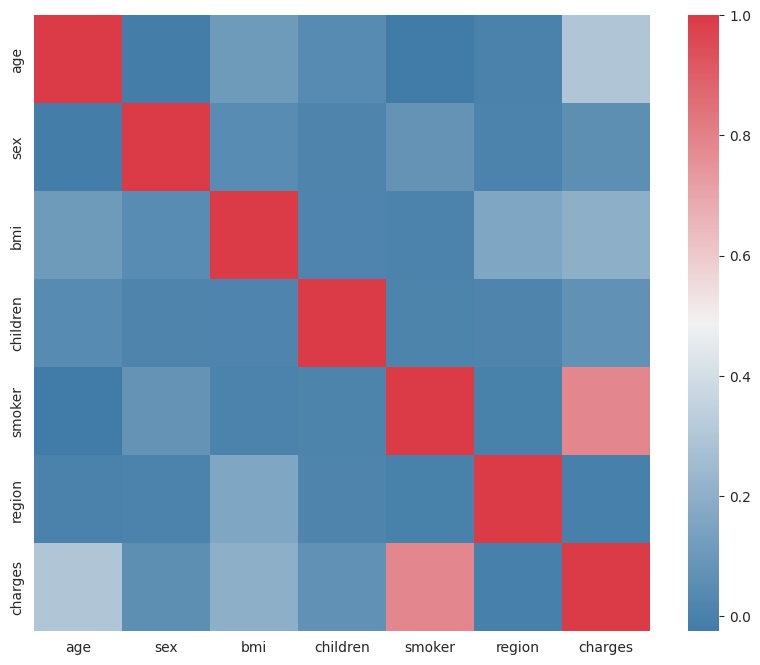

In [101]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax)

### Distribution of Charges for Smokers and Non-smokers :

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

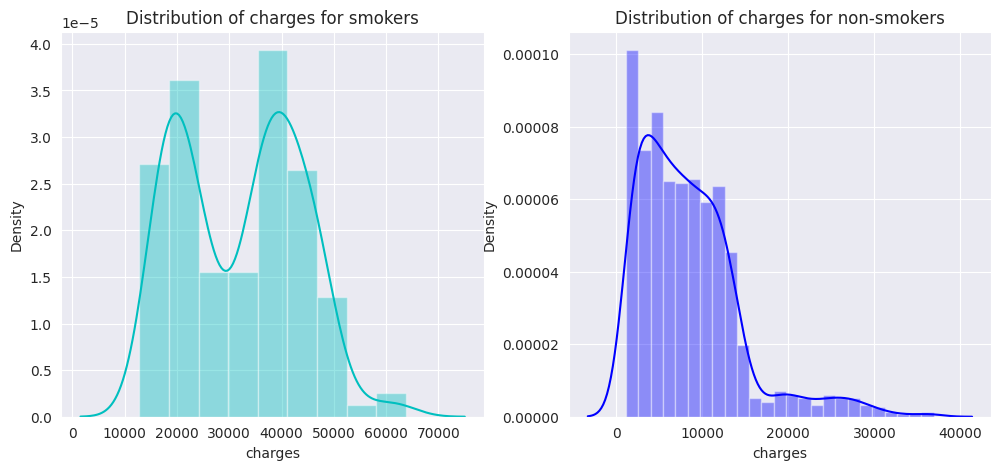

In [102]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

**Here we can see that the distribution charges for the smokers ranges from 30000 dollar to 40000 dollar where as for non smokers it shows that it is 10000 dollars. Which provides the great difference to be noteable.**

### Gender wise analysis for Smokers and Non-smokers

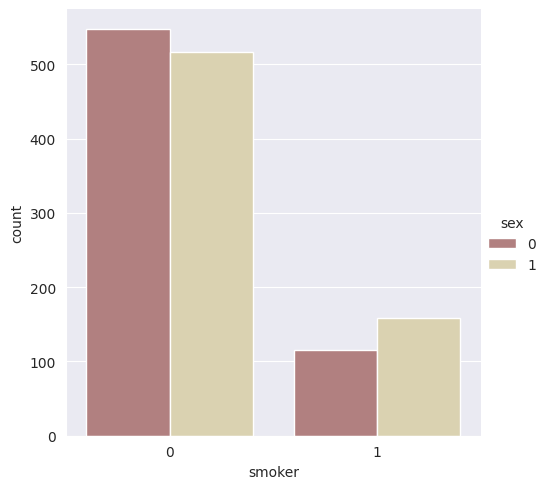

In [103]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Here it shows the smoker and non smoker analysis with respect to the gender.

1st column shows the number of Non-smokers where Dark brown shows the women community and light brown shows the Men community

2nd Column shows the smokers where the Dark brown shows the Women community and the light brown shows the men community.

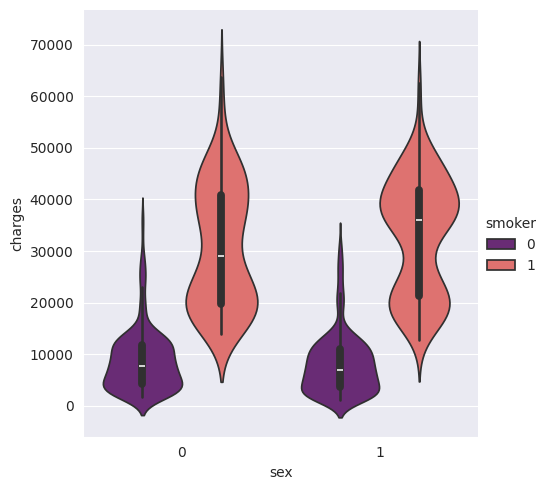

In [104]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

### Cost Analysis for Women Smokers and Non-smokers :

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

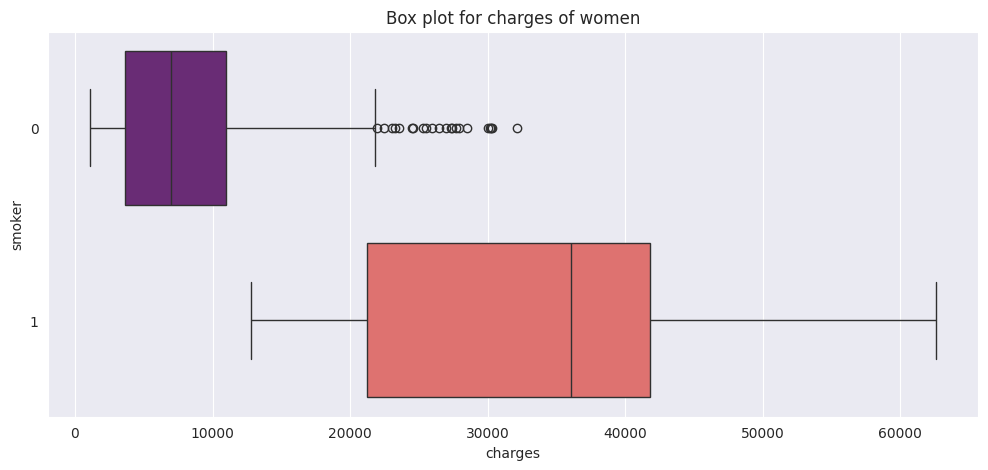

In [105]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

### Cost Analysis of Men Smokers and Non-smokers :

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

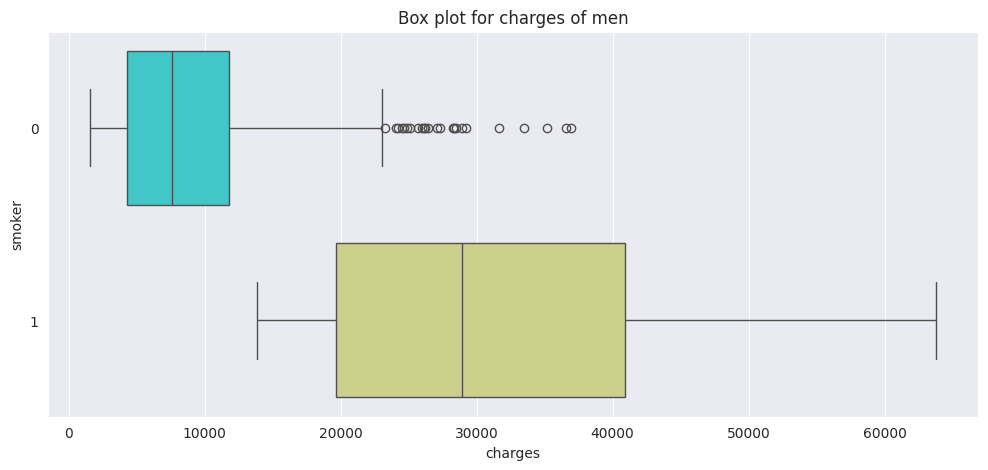

In [106]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

###  Age Distribution for the Smokers :

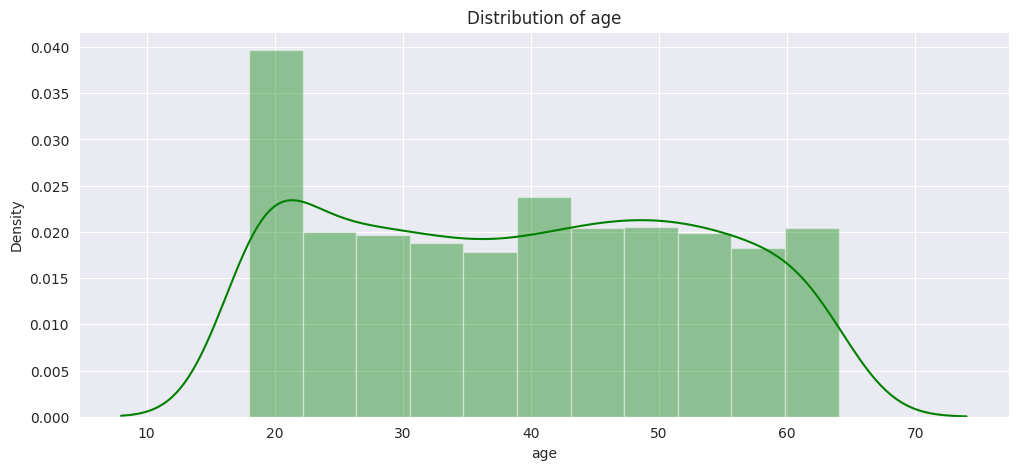

In [107]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')


### Ratio of 18-years old Smokers and Non-smokers :

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

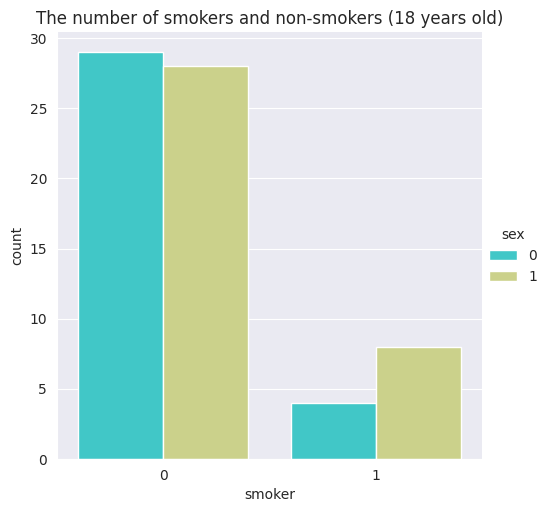

In [108]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

### Charges for 18-years old Smokers and Non-smokers :

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

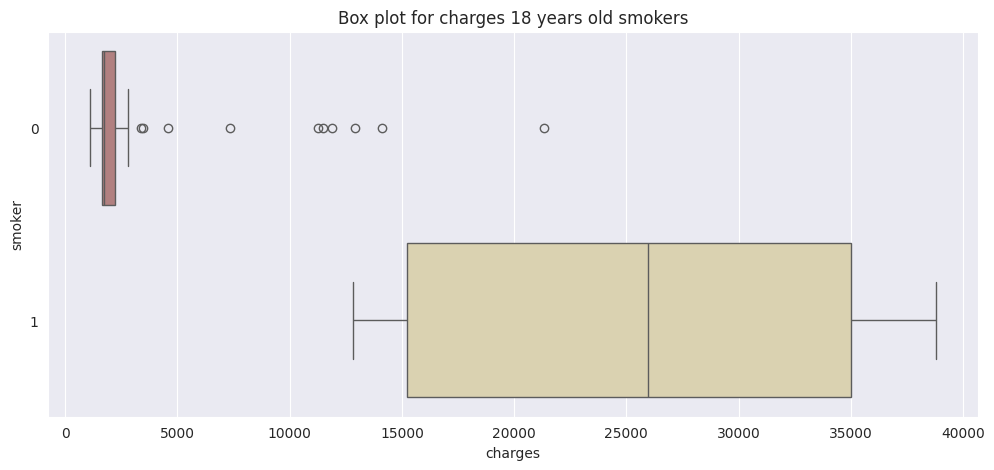

In [109]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

### Jointplot : Charges and Age of the Non-smokers :

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

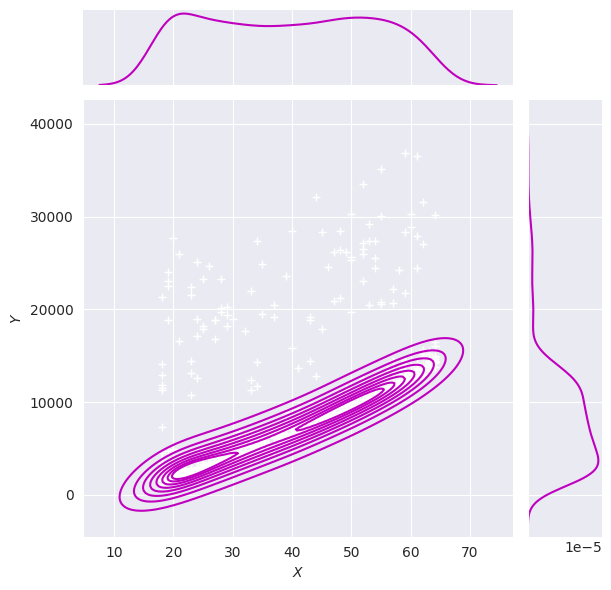

In [110]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

### Jointplot : Charges and Age of the Smokers :

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

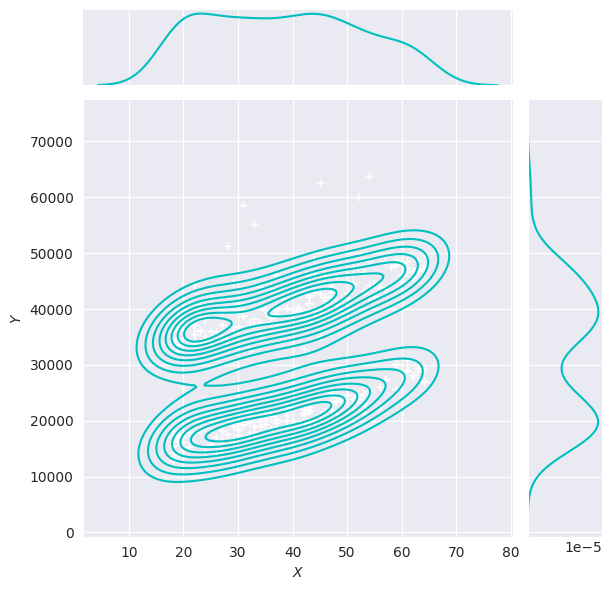

In [111]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

### Scatter Plot : Charges for Smokers and Non-smokers :

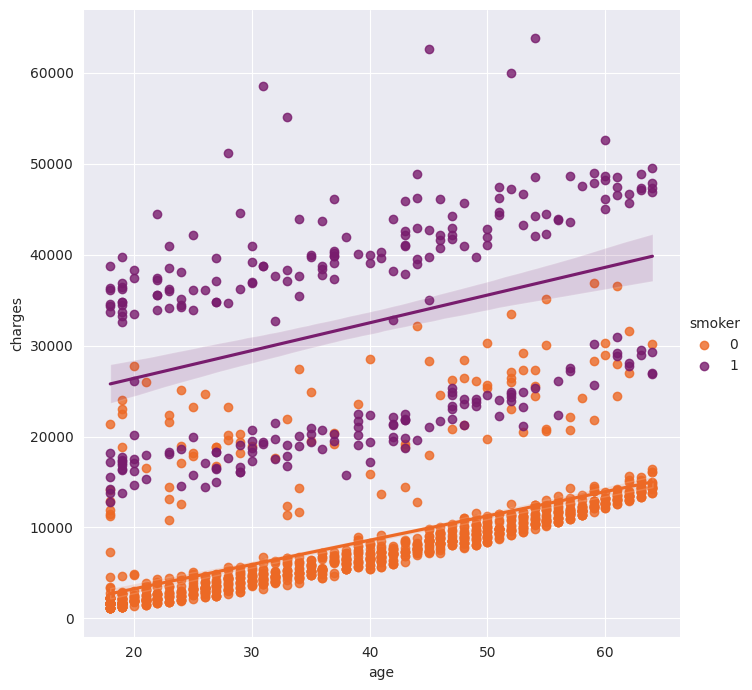

In [112]:
# Create the lmplot
lm = sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette='inferno_r', height=7)

# Set the title
lm.set_titles('Smokers and non-smokers')

#### In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. But we work with what we have! Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?

### BMI Distribution :

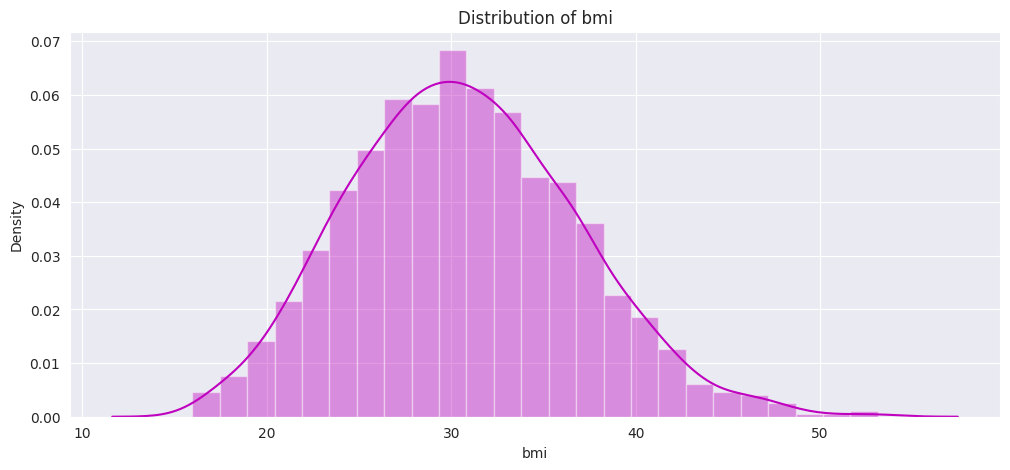

In [113]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

There's something insanely beautiful about this distribution, isn't there?
The average BMI in patients is 30. I think I should go to the great Google with a question about this indicator.

With a value equal to 30 starts obesity. I also calculated my BMI and now I can safely eat a sandwich. Let's start to explore! First, let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.

### Distribution of Charges for Patients with BMI greater than 30 :

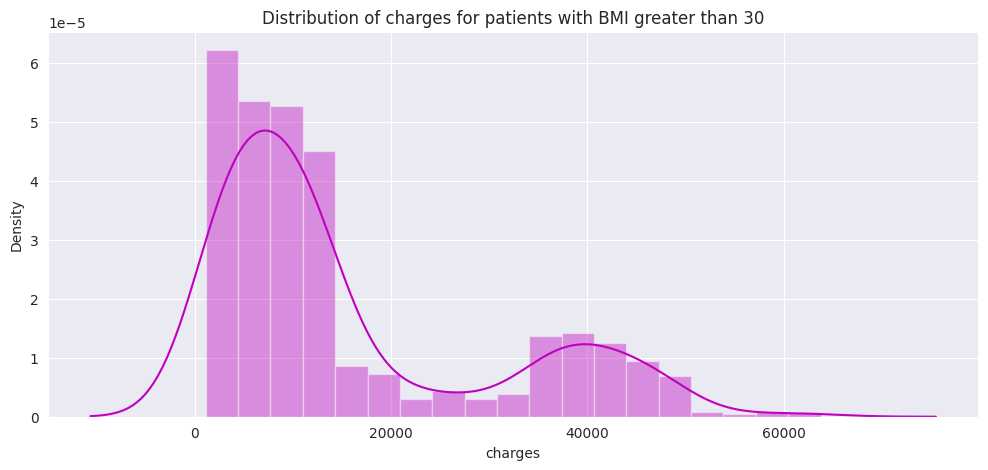

In [114]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

### Distribution of Charges for patients with BMI less than 30 :

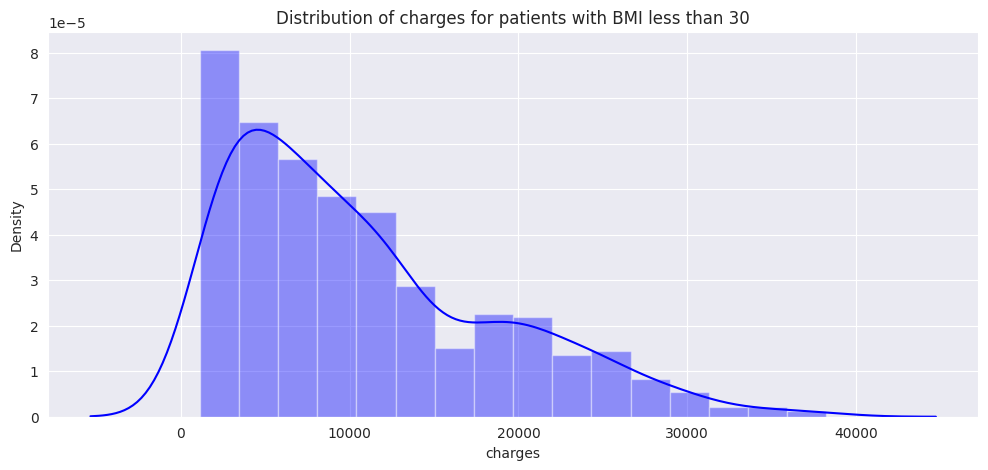

In [115]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

#### Patients with BMI above 30 spend more on treatment!

### Jointplot : Distribution of BMI and Charges :

Text(0.5, 1.0, 'Distribution of bmi and charges')

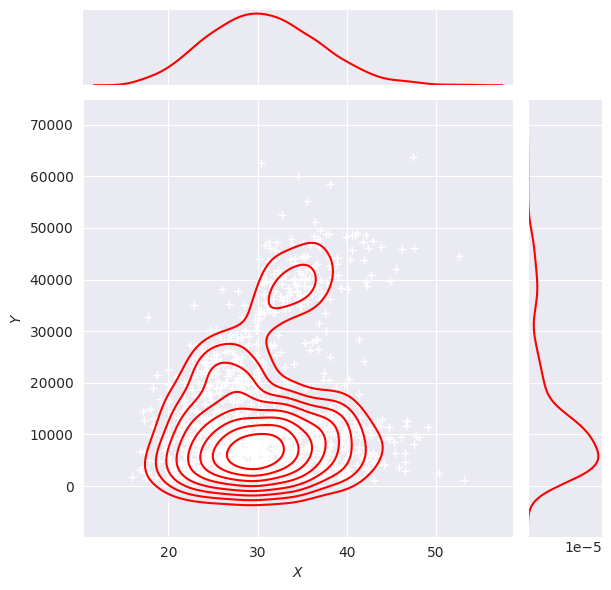

In [116]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

### Analysis on Charges of Smokers and Non-smokers using the Scatter Plot

Text(0.5, 1.03, 'Smokers and non-smokers')

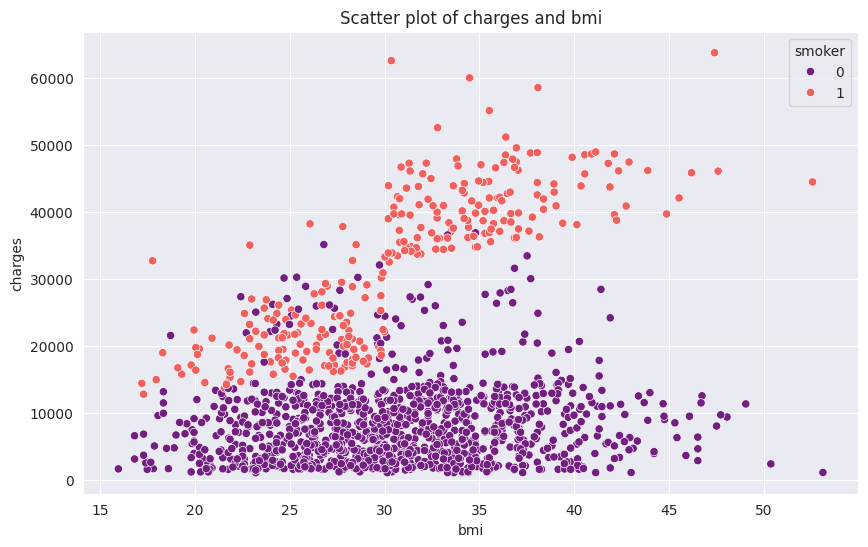

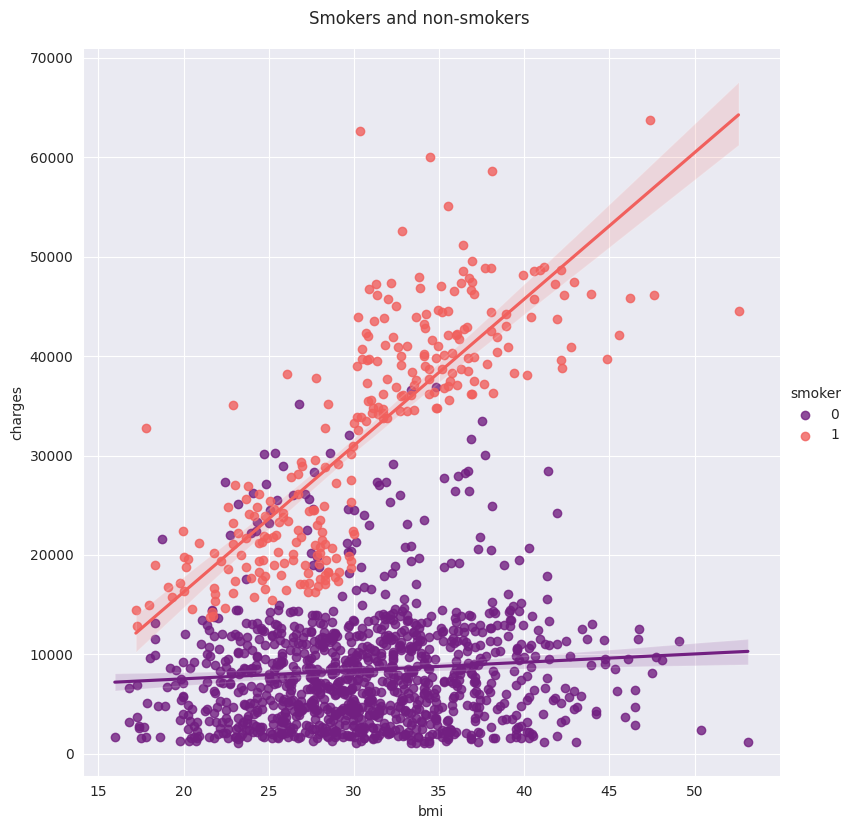

In [117]:
# Scatter plot with seaborn
pl.figure(figsize=(10, 6))
ax = sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', palette='magma')
ax.set_title('Scatter plot of charges and bmi')

# Linear model plot with seaborn
lm = sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette='magma', height=8)
lm.set_axis_labels('bmi', 'charges')  # Optionally set axis labels
lm.fig.suptitle('Smokers and non-smokers', y=1.03)  # Set the title with a y-offset

### Smoker Parents who have children at their home :

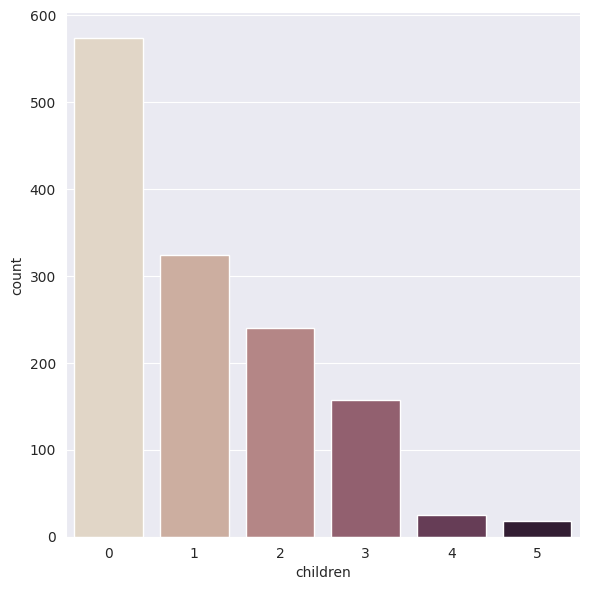

In [118]:
# Create the categorical plot
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height=6)

###  Distribution of Smoker and Non-smokers who have children

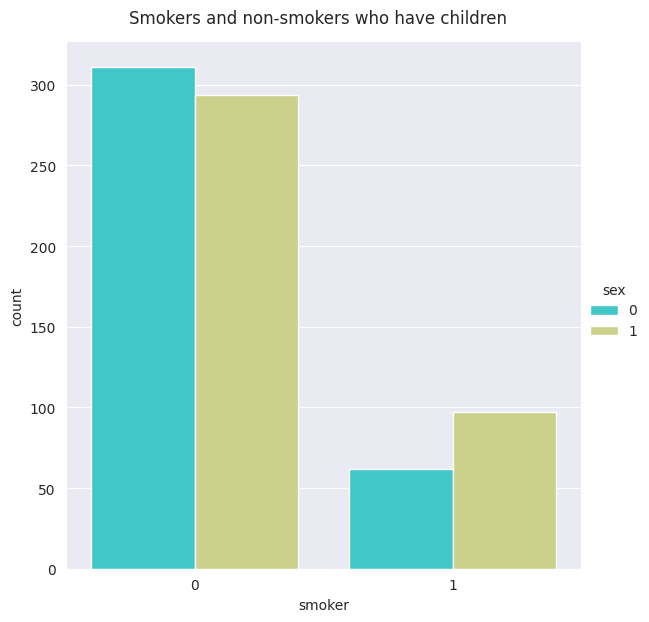

In [119]:
# Create the categorical plot
cat = sns.catplot(x="smoker", kind="count", palette="rainbow", hue="sex",
                  data=data[data.children > 0], height=6)

# Set the title
cat.set_titles('Smokers and non-smokers who have children')
cat.fig.suptitle('Smokers and non-smokers who have children', y=1.03)  # Adjust y for better spacing

pl.show()

### Health Effects of Smoking and Secondhand Smoke on Children :

1. Because their bodies are developing, infants and young children are especially vulnerable to the poisons in secondhand smoke.

2. Both babies whose mothers smoke while pregnant and babies who are exposed to secondhand smoke after birth are more likely to die from sudden infant death syndrome (SIDS) than babies who are not exposed to cigarette smoke.

3. Mothers who are exposed to secondhand smoke while pregnant are more likely to have lower birth weight babies, which makes babies weaker and increases the risk for many health problems.

4. Babies whose mothers smoke while pregnant or who are exposed to secondhand smoke after birth have weaker lungs than other babies, which increases the risk for many health problems.

5. Secondhand smoke exposure causes acute lower respiratory infections such as bronchitis and pneumonia in infants and young children.

6. Secondhand smoke exposure causes children who already have asthma to experience more frequent and severe attacks.

7. Secondhand smoke exposure causes respiratory symptoms, including cough, phlegm, wheezing, and breathlessness, among school-aged children.

8. Children exposed to secondhand smoke are at increased risk for ear infections and are more likely to need an operation to insert ear tubes for drainage.

## PART 2 :: Regression Models based on the dataset :

### Linear regression model :

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### Training the Dataset to predict :

In [121]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))


0.7962732059725786


**Not bad for such a lazy implementation, even without data normalization:D After all, the data will not always be so "good". So don't forget to pre-process the data. I'll show you all this later when I try to implement my own linear regression. So don't be mad at me please :) Now let's add polynomial signs. And look at the result.**

In [122]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147227


**Already good. Our model predicts well the cost of treatment of patients. I think we could limit ourselves to creating two or three polynomial features, but the data set is so small, so we went the easy way. And finally try RandomForestRegressor. I've never used this algorithm in regression analysis.**

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor with corrected criterion
forest = RandomForestRegressor(n_estimators=100,
                               criterion='squared_error',  # Use 'squared_error' instead of 'mse'
                               random_state=1,
                               n_jobs=-1)
# Fit the model
forest.fit(x_train, y_train)

# Predict
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

# Print the evaluation metrics
print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, forest_train_pred),
    mean_squared_error(y_test, forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, forest_train_pred),
    r2_score(y_test, forest_test_pred)))


MSE train data: 3746684.434, MSE test data: 19965476.411
R2 train data: 0.974, R2 test data: 0.873


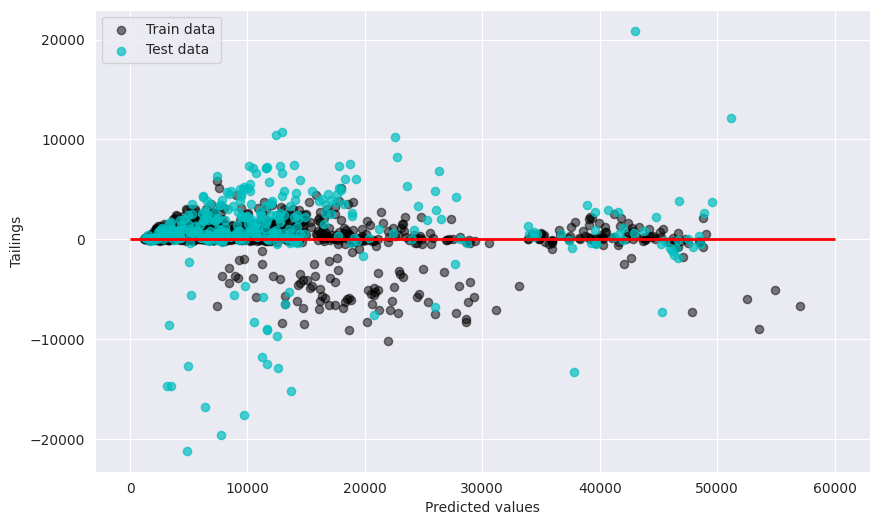

In [124]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

**Good result. But we see a noticeable retraining of the algorithm on the training data.**

### Data Visualization and Preprocessing :

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# regression models
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.preprocessing import PolynomialFeatures # for adding polynomial features
from sklearn.linear_model import Ridge # for ridge regression
from sklearn.linear_model import Lasso # for lasso regression
from sklearn.svm import SVR # for support vector regression
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
# hyptertuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# extra
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [126]:
dataset = pd.read_csv('insurance.csv')


### Age v/s Count and Age v/s Charges :

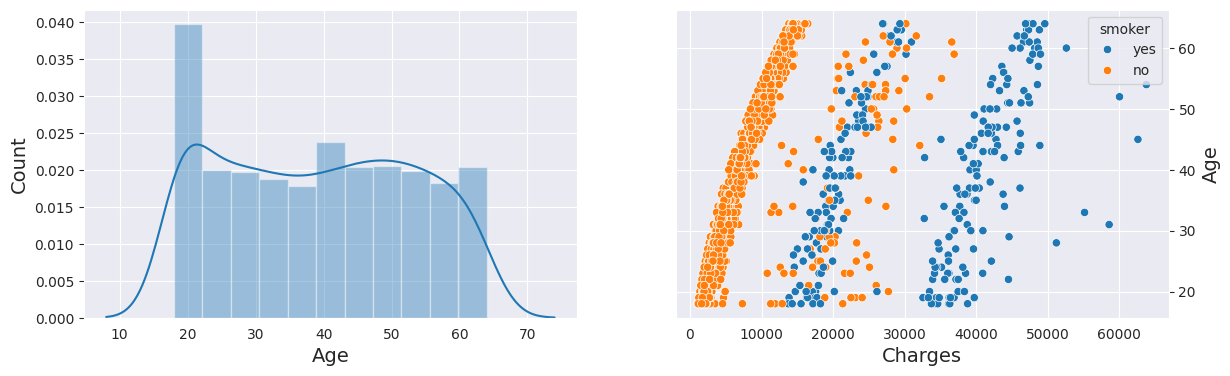

In [127]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['age'], ax = axes[0])
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'charges', y = 'age', data = dataset, hue = 'smoker', ax = axes[1])
axes[1].set_xlabel('Charges', fontsize=14)
axes[1].set_ylabel('Age', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

### Age v/s charges [by boxenplot representation]

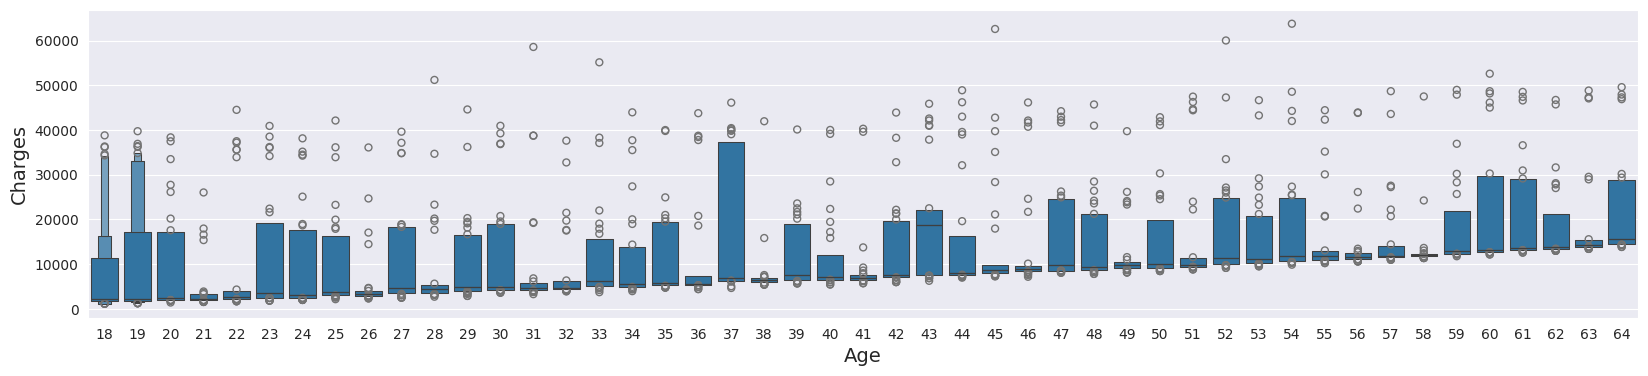

In [128]:
f, axe = plt.subplots(1,1,figsize=(20,4))
sns.boxenplot(x = 'age', y = 'charges', data = dataset, ax = axe)
axe.set_xlabel('Age', fontsize=14)
axe.set_ylabel('Charges', fontsize=14)
plt.show()

### BMI v/s Count and Charge v/s BMI :

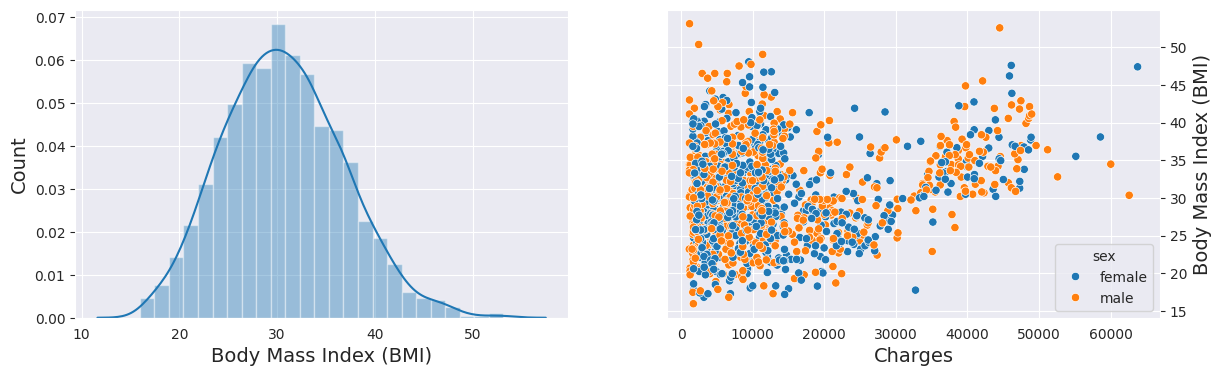

In [129]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['bmi'], ax = axes[0])
axes[0].set_xlabel('Body Mass Index (BMI)', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'charges', y = 'bmi', data = dataset, hue = 'sex',ax = axes[1])
axes[1].set_xlabel('Charges', fontsize=14)
axes[1].set_ylabel('Body Mass Index (BMI)', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

### Gender Distribution and Gender v/s Charges :

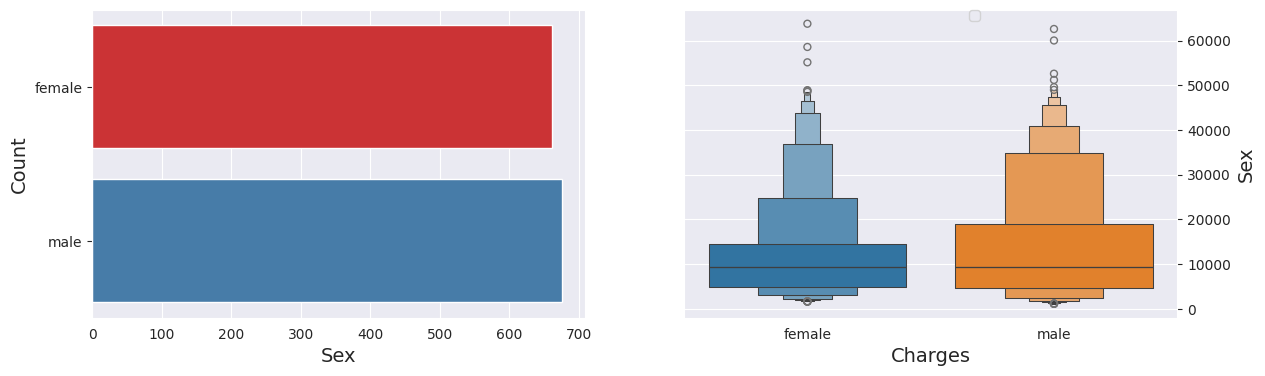

In [130]:
sex_list = Counter(dataset['sex'])
labels = sex_list.keys()
sizes = sex_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['sex'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Sex', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'sex', y = 'charges', data = dataset, hue = 'sex', ax = axes[1])
axes[1].set_xlabel('Charges', fontsize=14)
axes[1].set_ylabel('Sex', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(0.6,1), loc=1, borderaxespad=0.)

plt.show()

### Smokers having Children :

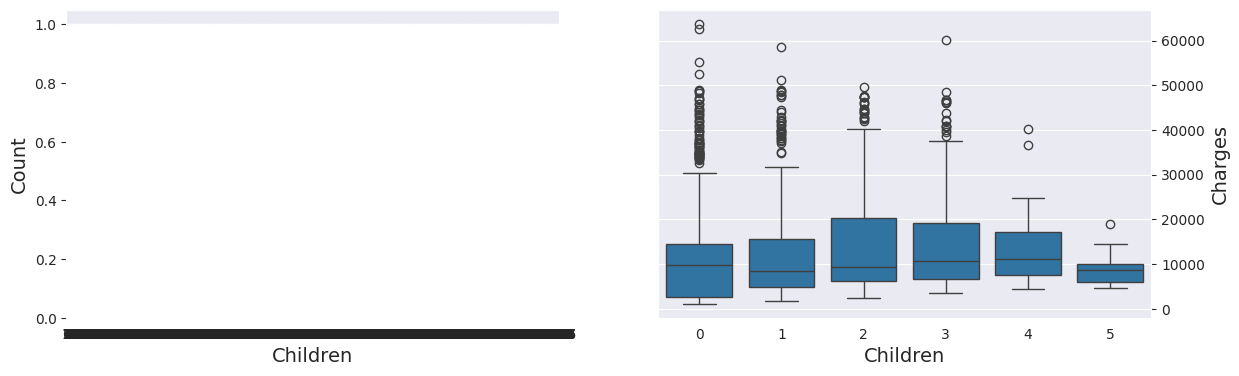

In [131]:
children_list = Counter(dataset['children'])
labels = children_list.keys()
sizes = children_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['children'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Children', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'children', y = 'charges', data = dataset, ax = axes[1])
axes[1].set_xlabel('Children', fontsize=14)
axes[1].set_ylabel('Charges', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

### Smokers v/s Charges

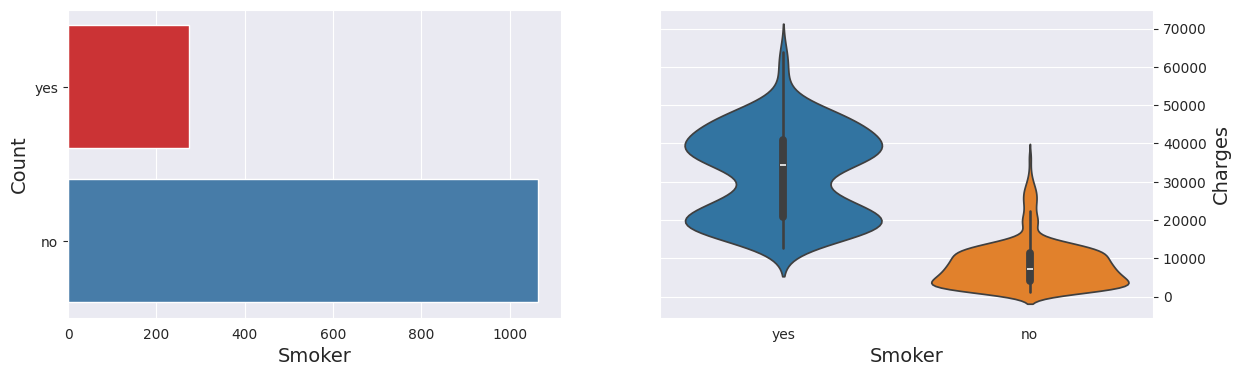

In [132]:
smoker_list = Counter(dataset['smoker'])
labels = smoker_list.keys()
sizes = smoker_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['smoker'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Smoker', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'smoker', y = 'charges', data = dataset, hue = 'smoker', ax = axes[1])
axes[1].set_xlabel('Smoker', fontsize=14)
axes[1].set_ylabel('Charges', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

### Region based Smokers analysis :

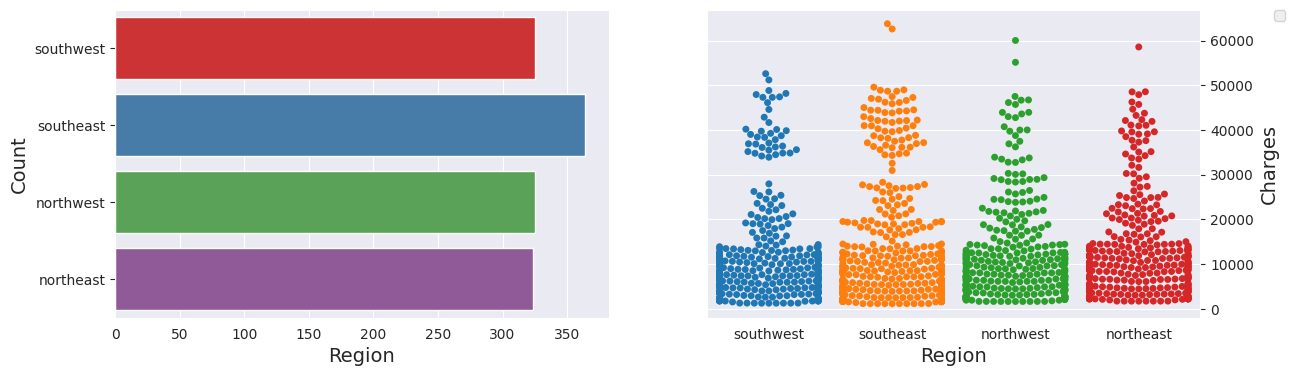

In [133]:
region_list = Counter(dataset['region'])
labels = region_list.keys()
sizes = region_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['region'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Region', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'region', y = 'charges', data = dataset, hue = 'region', ax = axes[1])
axes[1].set_xlabel('Region', fontsize=14)
axes[1].set_ylabel('Charges', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

Creating dummy datasets and train and test the model according to the dataset and then predict the issues.

In [134]:
dataset = pd.get_dummies(dataset)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [135]:
X = dataset.drop('charges', axis = 1).values
y = dataset['charges'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [136]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1003, 11)
Shape of X_test:  (335, 11)
Shape of y_train:  (1003, 1)
Shape of y_test (335, 1)


### Basic Linear Regression Model :

In [137]:
# Creating the linear regressor
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [138]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X, y = y, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7445006998667603
R2_score (train):  0.7449555328228536
R2_score (test):  0.7672642952734356
RMSE:  5926.023602394469


### Polynomial Regression - 2nd degree :

In [139]:
# Creating the polynomial features and regressor
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_train_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_train_poly, y_train)

LinearRegression()

In [140]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_poly, y = y, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.7212787583560385
R2_score (train):  0.839558086091776
R2_score (test):  0.8526215089531308
RMSE:  4715.72989917797


### Ridge Regression :

In [141]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [142]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'model__alpha': [43],
    'model__fit_intercept': [True],
    'model__tol': [0.0001],
    'model__solver': ['auto'],
    'model__random_state': [42]
}

regressor_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())


In [143]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.8364285533590552
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [144]:
# Predicting Cross Validation Score the Test set results
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score the Test set results
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8364285533590552
R2_score (train):  0.8427507255457396
R2_score (test):  0.8615641628327121
RMSE:  4570.420248306232


###  Lasso Regression :

In [145]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso())
]

lasso_pipe = Pipeline(steps)

In [146]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:np.arange(0.01, 1, 0.005) -> 0.9949

from sklearn.model_selection import GridSearchCV

parameters = {
    'model__alpha': [0.9949],
    'model__fit_intercept': [True],
    'model__tol': [0.0001],
    'model__max_iter': [5000],
    'model__random_state': [42]
}

regressor_lasso = GridSearchCV(lasso_pipe, parameters, cv=10, n_jobs=-1, verbose=4)
regressor_lasso = regressor_lasso.fit(X, y.ravel())


Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [147]:
# Predicting Cross Validation Score
cv_lasso = regressor_lasso.best_score_

# Predicting R2 Score the Test set results
y_pred_lasso_train = regressor_lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = regressor_lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.8362960067859149
R2_score (train):  0.8429615732935353
R2_score (test):  0.8615998023225331
RMSE:  4569.83189656797


### Support Vector Regression Model :

In [148]:
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1,1))

In [149]:
# Creating the SVR regressor
regressor_svr = SVR()

In [150]:
# Define the SVR model
regressor_svr = SVR()

# Define the parameter grid
parameters = {
    'kernel': ['rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
    'tol': [0.0001],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Apply Grid Search
grid_search = GridSearchCV(estimator=regressor_svr,
                           param_grid=parameters,
                           cv=10,
                           verbose=4,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_scaled, y_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [151]:
# Assuming grid_search is the GridSearchCV object
print(grid_search.best_params_)
print(grid_search.best_score_)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.0001}
0.8415232251442557


In [152]:
# Predicting Cross Validation Score
cv_svr = grid_search.best_score_

# Predicting R2 Score on the Train set results
# Ensure X_train is 2D
y_pred_svr_train = grid_search.predict(sc_X.transform(X_train))
y_pred_svr_train = sc_y.inverse_transform(y_pred_svr_train.reshape(-1, 1)).ravel()
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score on the Test set results
# Ensure X_test is 2D
y_pred_svr_test = grid_search.predict(sc_X.transform(X_test))
y_pred_svr_test = sc_y.inverse_transform(y_pred_svr_test.reshape(-1, 1)).ravel()
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE on the Test set results
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_test))

print('CV: ', cv_svr)
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)


CV:  0.8415232251442557
R2_score (train):  0.8434178666719045
R2_score (test):  0.8610479825123144
RMSE:  4578.933094397151


### Desicion Tree Regression :

In [153]:
# Creating the Decision Tree regressor
regressor_dt = DecisionTreeRegressor(random_state = 42)

In [154]:
# Define the DecisionTreeRegressor model
regressor_dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
parameters = {
    "max_depth": np.arange(1, 21),
    "min_samples_leaf": [1, 5, 10, 20, 50, 100],
    "min_samples_split": np.arange(2, 11),
    "criterion": ["squared_error"],  # Use 'squared_error' instead of 'mse'
}

# Apply Grid Search
grid_search = GridSearchCV(estimator=regressor_dt,
                           param_grid=parameters,
                           cv=10,
                           verbose=4,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_scaled, y_scaled.ravel())  # Ensure y_scaled is 1D if it's not already

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits
Best parameters found:  {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score found:  0.8524782784394495


In [156]:
print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8524782784394495


In [160]:
# Predicting Cross Validation Score
cv_dt = grid_search.best_score_

# Predicting R2 Score on the Train set results
# Ensure X_train is transformed and y_train is in the right format
y_pred_dt_train = grid_search.predict(sc_X.transform(X_train))
# No need to inverse transform if predictions are already in the same scale
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score on the Test set results
# Ensure X_test is transformed
y_pred_dt_test = grid_search.predict(sc_X.transform(X_test))
# No need to inverse transform if predictions are already in the same scale
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE on the Test set results
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

print('CV Score: ', cv_dt)
print('R2 Score (Train): ', r2_score_dt_train)
print('R2 Score (Test): ', r2_score_dt_test)
print("RMSE (Test): ", rmse_dt)

CV Score:  0.8524782784394495
R2 Score (Train):  -1.2131562146275026
R2 Score (Test):  -1.16825402356783
RMSE (Test):  18087.850087424922


### Random Forest Regression :

In [161]:
# Creating the Random Forest regressor
regressor_rf = RandomForestRegressor()

Because of RandomSearch and GridSeach have took about 20 minutes, I didn't include these steps in the kernel's final form. But you can expand the following 2 cells and view how changed the parameters.

In [164]:
# Define the RandomForestRegressor model
regressor_rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
parameters = {
    "n_estimators": [1200],
    "max_features": ["auto"],
    "max_depth": [50],
    "min_samples_split": [7],
    "min_samples_leaf": [10],
    "bootstrap": [True],
    "criterion": ["squared_error"],  # Updated criterion
    "random_state": [42]
}

# Apply Grid Search
grid_search_rf = GridSearchCV(estimator=regressor_rf,
                              param_grid=parameters,
                              cv=10,
                              n_jobs=-1,
                              verbose=4)  # Uncomment if verbose output is needed

# Fit the model
grid_search_rf.fit(X_scaled, y.ravel())

# Print the best parameters and best score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score found: ", grid_search_rf.best_score_)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters found:  {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
Best score found:  0.8587777432753292


In [167]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = grid_search.best_score_

# Predicting R2 Score the Train set results
y_pred_rf_train = grid_search.predict(sc_X.transform(X_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = grid_search.predict(sc_X.transform(X_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8524782784394495
R2_score (train):  -1.2131562146275026
R2_score (test):  -1.16825402356783
RMSE:  18087.850087424922


### Error Measurement :

In [168]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())
         ]

### Checking the scores of RMSE, R2_score (training), R2_score (test) and Cross Validation

In [169]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5926.023602,0.744956,0.767264,0.744501
1,Polynomial Regression (2nd),4715.729899,0.839558,0.852622,0.721279
2,Ridge Regression,4570.420248,0.842751,0.861564,0.836429
3,Lasso Regression,4569.831897,0.842962,0.861600,0.836296
4,Support Vector Regression,4578.933094,0.843418,0.861048,0.841523
5,Decision Tree Regression,18087.850087,-1.213156,-1.168254,0.852478
6,Random Forest Regression,18087.850087,-1.213156,-1.168254,0.852478


### Which model is better in terms of Cross Validation Score ?

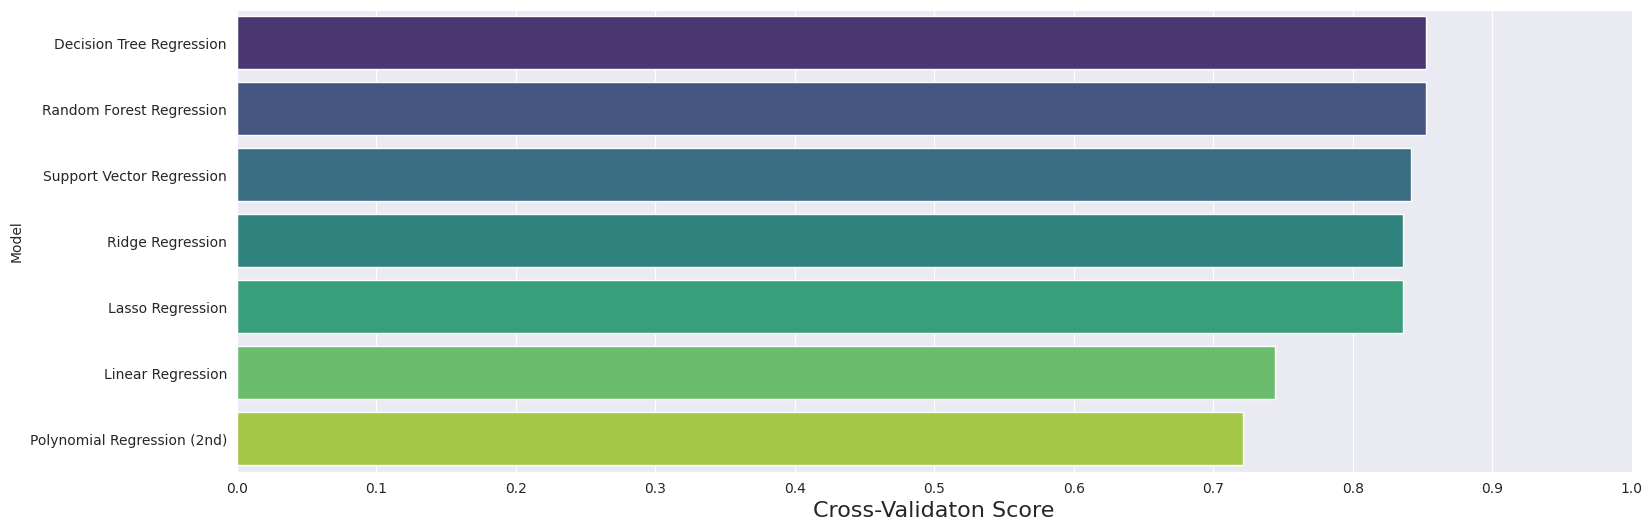

In [170]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

### Result :: In terms of Cross Validation scores the "RANDOM FOREST REGRESSION" provides higher accuracy

### Which model is better than in terms of R2_score (Training and Test) ?

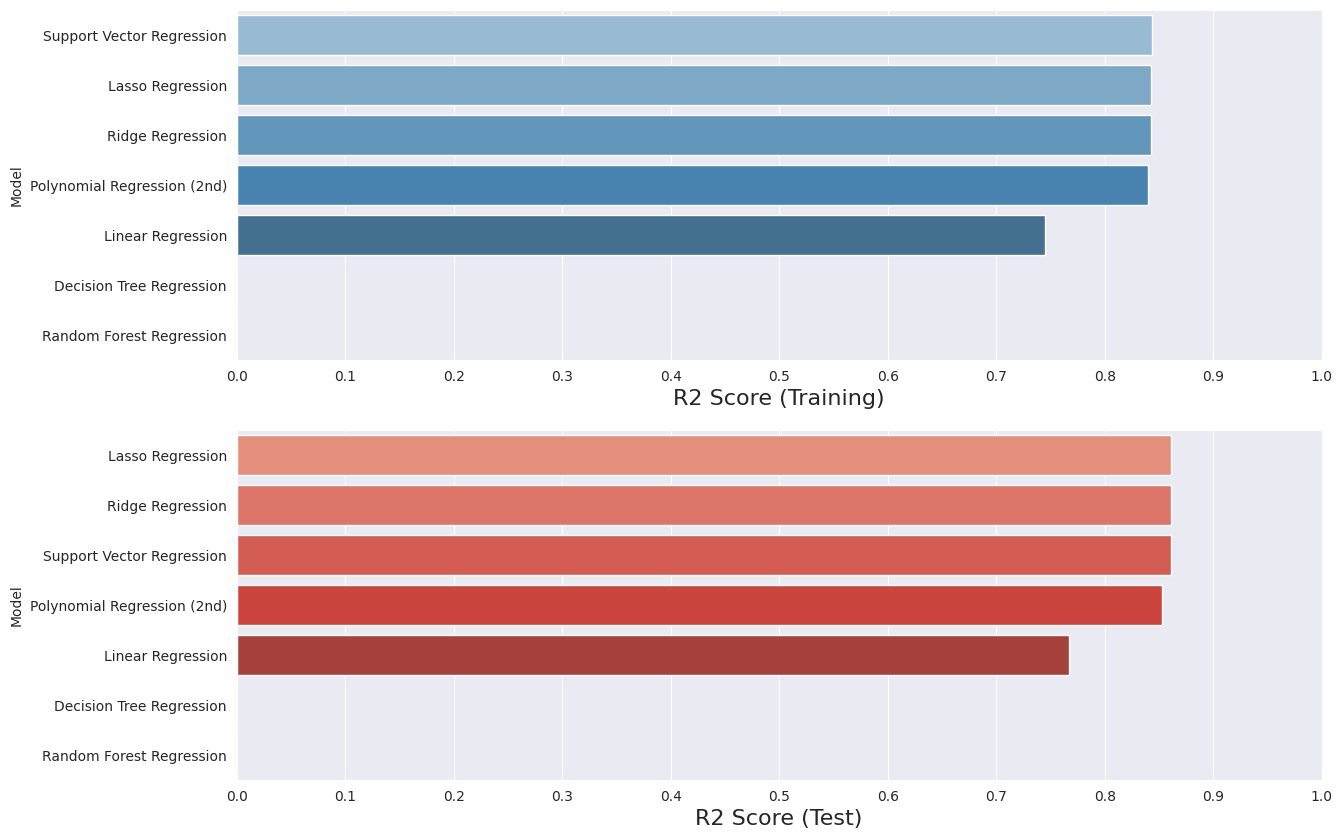

In [171]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Result :: In terms of R2_score (for both the training and test) the "RANDOM FOREST REGRESSION" provides higher accuracy

### Which model is better in terms of RMSE ?

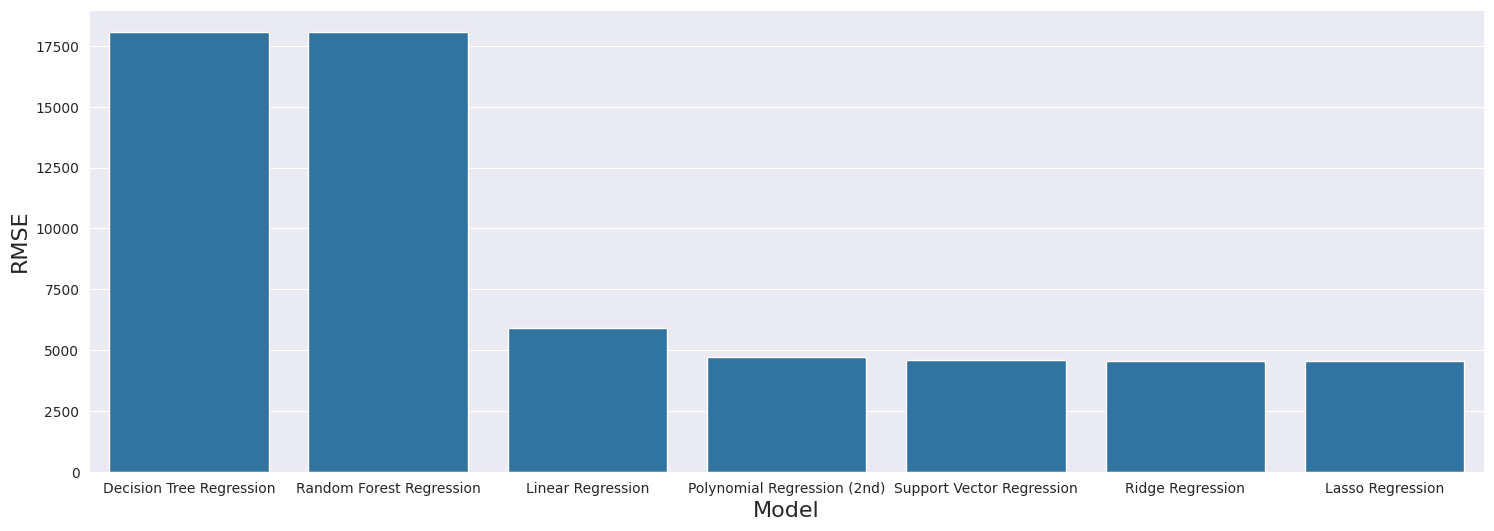

In [172]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

### Result :: In terms of Cross Validation scores the "LINEAR REGRESSION" provides higher accuracy

**Results :** Male smokers incurred 11% more medical costs (after adjustment for age, physical functioning status, alcohol consumption, body mass index and average time spent walking) than ‘never smokers’ but for female smokers and never smokers the costs were almost the same. This difference was mainly attributable to increased use of inpatient medical care among smokers, especially in males, where per month cost of inpatient care was 33% higher in smokers. Age-group specific analysis in men showed that excess mortality and excess medical cost ratio for smokers peaked in those aged 60–69 years.

**Conclusions :**
Smokers consume excess medical care. Among the population aged 45 years and over, about 4% of total medical costs were attributable to smoking. To pursue both better health and lower medical costs for the nation, a comprehensive programme to reduce tobacco use is needed.


**KEY MESSAGES :**

1. The impact of smoking on medical care use was examined in a 30-month prospective population-based cohort study in Japan (N = 43 408).


2. Male smokers incurred 11% more medical costs than ‘never smokers’ but for female smokers and never smokers the costs were almost the same.


3. This difference was mainly attributable to the increased use of inpatient medical care among smokers, especially in males, where per month cost of inpatient care was 33% higher in smokers.